<a href="https://colab.research.google.com/github/TECTONATZY/Project-Data-analyst-umkm-jabar-2014-2025/blob/main/Proyek_Data_Analyst_untuk_umkm_daerah_jabar_2014_2025_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import semua data yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Membaca dataset umkm jabar 2014-2025

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/filedata/data_umkm_jabar.csv')
dataset.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,proyeksi_jumlah_umkm,satuan,tahun
0,1,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,927,UNIT,2017
1,2,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,927,UNIT,2017
2,3,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,132,UNIT,2017
3,4,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,33111,UNIT,2017
4,5,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,32316,UNIT,2017
5,6,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,KONVEKSI,19734,UNIT,2017
6,7,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,KULINER,142508,UNIT,2017
7,8,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,MAKANAN,104232,UNIT,2017
8,9,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,MINUMAN,19337,UNIT,2017
9,10,32.0,JAWA BARAT,3201,KABUPATEN BOGOR,JASA/LAINNYA,45030,UNIT,2017


Mengecheck value data apakah sudah sesuai dengan type nya

In [3]:
dataset1 = dataset.info()
dataset2 = dataset.describe()
dataset3 = dataset.shape

print(f"dataset info : \n {dataset1}")
print(f"dataset statistik sederhana  : \n {dataset2}")
print(f"dataset baris dan kolom : \n {dataset3}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1890 non-null   int64  
 1   kode_provinsi         1889 non-null   float64
 2   nama_provinsi         1890 non-null   object 
 3   kode_kabupaten_kota   1890 non-null   int64  
 4   nama_kabupaten_kota   1890 non-null   object 
 5   kategori_usaha        1890 non-null   object 
 6   proyeksi_jumlah_umkm  1890 non-null   int64  
 7   satuan                1890 non-null   object 
 8   tahun                 1890 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.0+ KB
dataset info : 
 None
dataset statistik sederhana  : 
                 id  kode_provinsi  kode_kabupaten_kota  proyeksi_jumlah_umkm  \
count  1890.000000         1889.0          1890.000000           1890.000000   
mean    945.500000           32.0          3231.333333

Mengecheck nilai duplicate dan kosong

In [4]:
dataset4 = dataset.isnull().sum()
dataset5 = dataset.duplicated().sum()

print(f"dataset null : \n{dataset4}")
print(f"dataset null : \n{dataset5}")

dataset null : 
id                      0
kode_provinsi           1
nama_provinsi           0
kode_kabupaten_kota     0
nama_kabupaten_kota     0
kategori_usaha          0
proyeksi_jumlah_umkm    0
satuan                  0
tahun                   0
dtype: int64
dataset null : 
0


Melakukan Statistik Sederhana untuk dataset

In [5]:
#statistika desktiptif

#memisahkan dataset numerical dan kategorical
numerical = dataset.select_dtypes(include=np.number)
categorical = dataset.select_dtypes(exclude=np.number)

print(f"dataset numerical : \n{numerical}")
print(f"dataset categorical : \n{categorical}")

dataset numerical : 
        id  kode_provinsi  kode_kabupaten_kota  proyeksi_jumlah_umkm  tahun
0        1           32.0                 3201                   927   2017
1        2           32.0                 3201                   927   2017
2        3           32.0                 3201                   132   2017
3        4           32.0                 3201                 33111   2017
4        5           32.0                 3201                 32316   2017
...    ...            ...                  ...                   ...    ...
1885  1886           32.0                 3279                  1953   2023
1886  1887           32.0                 3279                 14106   2023
1887  1888           32.0                 3279                 10318   2023
1888  1889           32.0                 3279                  1914   2023
1889  1890            NaN                 3279                  4457   2023

[1890 rows x 5 columns]
dataset categorical : 
     nama_provinsi 

In [ ]:
categorical.describe()

,nama_provinsi,nama_kabupaten_kota,kategori_usaha,satuan
count,1890,1890,1890,1890
unique,1,27,10,1
top,JAWA BARAT,KABUPATEN BOGOR,AKSESORIS,UNIT
freq,1890,70,189,1890


In [ ]:
numerical.describe()

,id,kode_provinsi,kode_kabupaten_kota,proyeksi_jumlah_umkm,tahun
count,1890.000000,1889.0,1890.000000,1890.000000,1890.000000
mean,945.500000,32.0,3231.333333,21982.783069,2020.000000
std,545.740323,0.0,31.210110,31495.756269,2.000529
min,1.000000,32.0,3201.000000,9.000000,2017.000000
25%,473.250000,32.0,3207.000000,704.500000,2018.000000
50%,945.500000,32.0,3214.000000,11068.500000,2020.000000
75%,1417.750000,32.0,3273.000000,26647.250000,2022.000000
max,1890.000000,32.0,3279.000000,204302.000000,2023.000000


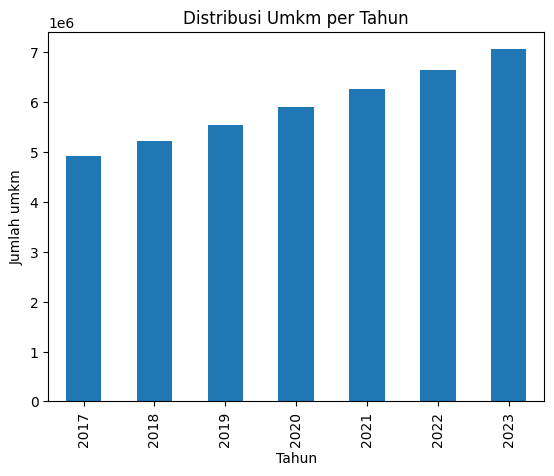

In [ ]:
#data distribusi umkm per tahunnya
distribusi = dataset.groupby('tahun')['proyeksi_jumlah_umkm'].sum().sort_values(ascending=True)
distribusi

distribusi.plot(kind = 'bar')
plt.title('Distribusi Umkm per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah umkm')
plt.show()

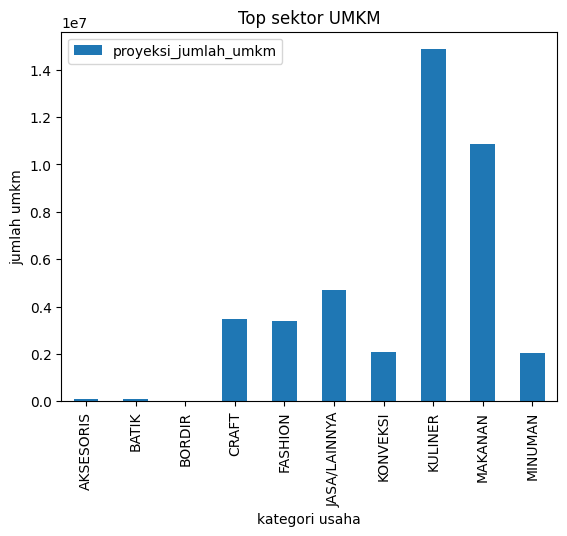

In [ ]:
#Top sektor UMKM untuk jabar
top_sektor = dataset.groupby('kategori_usaha').agg({'proyeksi_jumlah_umkm' : 'sum'})
top_sektor.sort_values(by = 'proyeksi_jumlah_umkm', ascending = True)

#grafik
top_sektor.plot(kind = 'bar')
plt.title('Top sektor UMKM')
plt.xlabel('kategori usaha')
plt.ylabel('jumlah umkm')
plt.show()

In [ ]:
df_per_kota = dataset.groupby('nama_kabupaten_kota')['proyeksi_jumlah_umkm'].sum().reset_index()
df_per_kota.sort_values(by = 'proyeksi_jumlah_umkm', ascending = False).head(10).reset_index()

,index,nama_kabupaten_kota,proyeksi_jumlah_umkm
0,3,KABUPATEN BOGOR,3362016
1,0,KABUPATEN BANDUNG,3166856
2,18,KOTA BANDUNG,3083142
3,15,KABUPATEN SUKABUMI,2411393
4,7,KABUPATEN GARUT,2322996
5,6,KABUPATEN CIREBON,2264402
6,5,KABUPATEN CIANJUR,2248302
7,9,KABUPATEN KARAWANG,2094099
8,2,KABUPATEN BEKASI,2071112
9,20,KOTA BEKASI,1820243


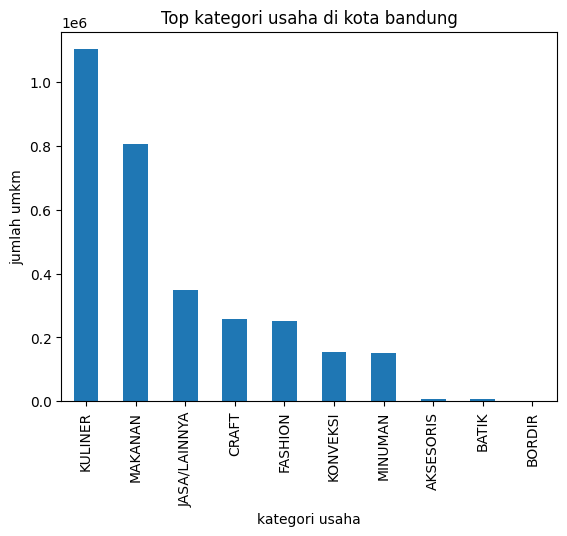

<Figure size 640x480 with 0 Axes>

In [ ]:
kota_bandung =  dataset[dataset['nama_kabupaten_kota'] == 'KOTA BANDUNG']

kategori_usaha = kota_bandung.groupby('kategori_usaha')['proyeksi_jumlah_umkm'].sum().sort_values(ascending=False)

kategori_usaha.plot(kind = 'bar')
plt.title('Top kategori usaha di kota bandung')
plt.xlabel('kategori usaha')
plt.ylabel('jumlah umkm')
plt.show()
plt.tight_layout()

In [ ]:
#filtering khusus kota bandung dan kabupaten saja untuk proyeksi jumlah umkmnya
umkm_bandung = dataset[dataset['nama_kabupaten_kota'].isin(['KABUPATEN BANDUNG', 'KOTA BANDUNG'])]
umkm_bandung

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,proyeksi_jumlah_umkm,satuan,tahun
30,31,32.0,JAWA BARAT,3204,KABUPATEN BANDUNG,AKSESORIS,873,UNIT,2017
31,32,32.0,JAWA BARAT,3204,KABUPATEN BANDUNG,BATIK,873,UNIT,2017
32,33,32.0,JAWA BARAT,3204,KABUPATEN BANDUNG,BORDIR,125,UNIT,2017
33,34,32.0,JAWA BARAT,3204,KABUPATEN BANDUNG,CRAFT,31188,UNIT,2017
34,35,32.0,JAWA BARAT,3204,KABUPATEN BANDUNG,FASHION,30440,UNIT,2017
...,...,...,...,...,...,...,...,...,...
1825,1826,32.0,JAWA BARAT,3273,KOTA BANDUNG,KONVEKSI,25944,UNIT,2023
1826,1827,32.0,JAWA BARAT,3273,KOTA BANDUNG,KULINER,187355,UNIT,2023
1827,1828,32.0,JAWA BARAT,3273,KOTA BANDUNG,MAKANAN,137034,UNIT,2023
1828,1829,32.0,JAWA BARAT,3273,KOTA BANDUNG,MINUMAN,25422,UNIT,2023


Tidak terdapat outlier disini karenaa nilai tidak terlampau jauh.


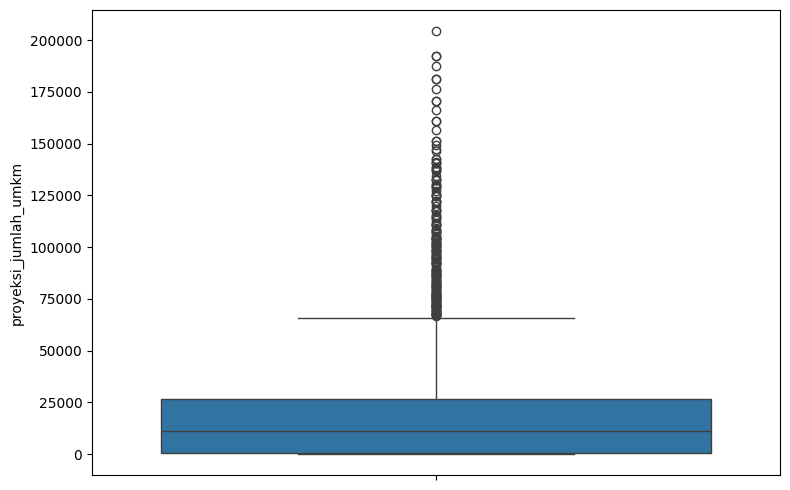

In [ ]:
#UNIVARIAT ANALYSIS

#mencari nilai outlier dari setiap rows
plt.figure(figsize=(8,5))
sns.boxplot(y=dataset['proyeksi_jumlah_umkm'])
plt.tight_layout()
plt.show()

Terdapat distirbusi arah positif skewed

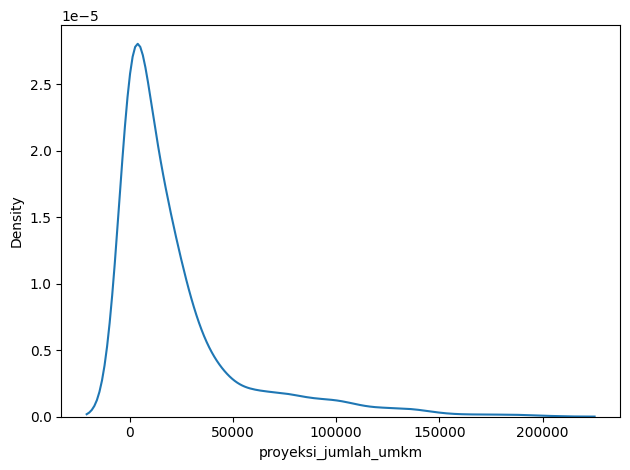

In [ ]:
#individual plot menemukan distribusi nya
sns.kdeplot(data = dataset, x = 'proyeksi_jumlah_umkm')
plt.tight_layout()
plt.show()

In [ ]:
#correlation umkm jabar
numerical.corr()

,id,kode_provinsi,kode_kabupaten_kota,proyeksi_jumlah_umkm,tahun
id,1.000000,NaN,1.272743e-01,0.051068,9.897435e-01
kode_provinsi,NaN,NaN,NaN,NaN,NaN
kode_kabupaten_kota,0.127274,NaN,1.000000e+00,-0.183436,-3.321694e-14
proyeksi_jumlah_umkm,0.051068,NaN,-1.834358e-01,1.000000,8.357391e-02
tahun,0.989743,NaN,-3.321694e-14,0.083574,1.000000e+00


In [ ]:
#drop nilai tidak perlu di numerical
numerical = numerical.drop(['id','kode_provinsi','kode_kabupaten_kota'])

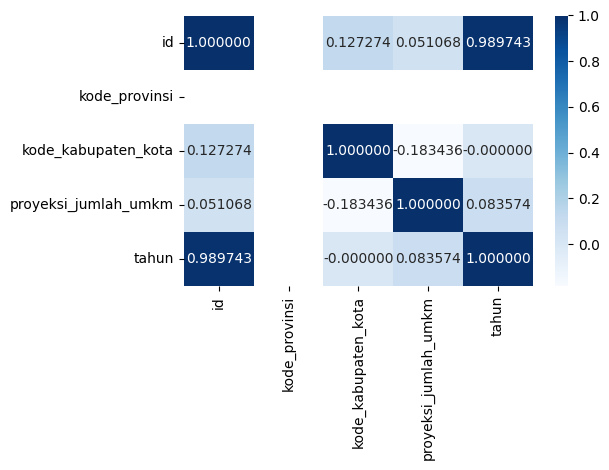

In [ ]:
sns.heatmap(numerical.corr(),cmap='Blues',annot = True, fmt = '2f')
plt.tight_layout()
plt.show()